In [1]:
pwd


'C:\\Users\\01064913'

In [2]:
cd desktop


C:\Users\01064913\desktop


In [3]:
cd matplot

C:\Users\01064913\desktop\matplot


In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
clinical_trial = pd.read_csv("clinical_trial.csv")

In [7]:
#data = pd.merge(mouse_drug_data, cliical_trial, how ="left")
#mouse_drug_data.head()

In [8]:
#clinical_trial.head()

In [9]:
data = pd.merge(mouse_drug_data, clinical_trial, how ="left", on =["Mouse ID", "Mouse ID"])

In [55]:
data.head(10)



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [11]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_data = data.groupby(["Drug","Timepoint"])
#grouped_data.head(5)
Mean_Tumor_data = grouped_data["Tumor Volume (mm3)"].mean()
#Mean_Tumor_data.head(5)
Tumordata = pd.DataFrame(Mean_Tumor_data).reset_index()
Tumordata.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [12]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_standard_error=grouped_data["Tumor Volume (mm3)"].sem()
Tumor_volumen_MSE = pd.DataFrame(mean_standard_error).reset_index()
Tumor_volumen_MSE.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
# Minor Data Munging to Re-Format the Data Frames
clean_Data =Tumordata.pivot(index = "Timepoint",columns="Drug",values="Tumor Volume (mm3)" )
clean_Data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [56]:
Capomulin_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Capomulin","Tumor Volume (mm3)"]
#Capomulin_error
#Ceftamin_error =Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Ceftamin","Tumor Volume (mm3)"]
Infubinol_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Ketapril","Tumor Volume (mm3)"]
Ketapril_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Infubinol","Tumor Volume (mm3)"]
#Naftisol_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Naftisol","Tumor Volume (mm3)"]
Placebo_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Placebo","Tumor Volume (mm3)"]
#Propriva_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Propriva","Tumor Volume (mm3)"]
Ramicane_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Ramicane","Tumor Volume (mm3)"]
#Stelasyn_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Stelasyn","Tumor Volume (mm3)"]
#Zoniferol_error = Tumor_volumen_MSE.loc[Tumor_volumen_MSE["Drug"]=="Zoniferol","Tumor Volume (mm3)"]
Time = list(range(0, 50,5))

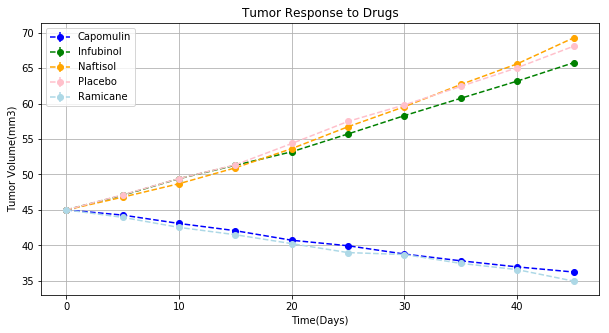

In [83]:
plt.figure(figsize =(10,5))
plt.errorbar(Time, clean_Data["Capomulin"], yerr = Capomulin_error, label = "Capomulin", marker = "o", color= "blue", linestyle ='--' )
#plt.errorbar(Time, clean_Data["Ceftamin"], yerr = Ceftamin_error, label = "Ceftamin", marker = "o", color= "red", linestyle ='--')
plt.errorbar(Time, clean_Data["Infubinol"], yerr = Infubinol_error, label = "Infubinol", marker = "o", color= "green", linestyle ='--')
#plt.errorbar(Time, clean_Data["Ketapril"], yerr = Ketapril_error, label = "Ketapril", marker = "o", color= "black", linestyle ='--')
plt.errorbar(Time, clean_Data["Naftisol"], yerr = Naftisol_error, label = "Naftisol", marker = "o", color= "orange", linestyle ='--')
plt.errorbar(Time, clean_Data["Placebo"], yerr = Placebo_error, label = "Placebo", marker = "o", color= "pink", linestyle ='--')
#plt.errorbar(Time, clean_Data["Propriva"], yerr = Propriva_error, label = "Propriva", marker = "o", color= "brown", linestyle ='--')
plt.errorbar(Time, clean_Data["Ramicane"], yerr = Ramicane_error, label = "Ramicane", marker = "o", color= "lightblue", linestyle ='--')
#plt.errorbar(Time, clean_Data["Stelasyn"], yerr = Stelasyn_error, label = "Stelasyn", marker = "o", color= "grey", linestyle ='--')
#plt.errorbar(Time, clean_Data["Zoniferol"], yerr = Zoniferol_error, label = "Zoniferol", marker = "o", color= "purple", linestyle ='--')
plt.legend()
plt.title ("Tumor Response to Drugs")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid()
plt.savefig("Tumor_Respons.png")
plt.show()








In [72]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#group_data = data.groupby(["Drug","Timepoint"])
Mean_Metsite_data = grouped_data ["Metastatic Sites"].mean()

#Mean_Metsite_data
# Convert to DataFrame
Metastatic_data = pd.DataFrame(Mean_Metsite_data).reset_index()
Metastatic_data.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [60]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_Met_data = grouped_data["Metastatic Sites"].sem()
# Convert to DataFrame
Metsite_error =pd.DataFrame(standard_error_Met_data).reset_index()
Metsite_error.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [74]:
# Minor Data Munging to Re-Format the Data Frames
cleaned_Metsite_data = Metastatic_data.pivot(index = "Timepoint", columns = "Drug", values ="Metastatic Sites")
cleaned_Metsite_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


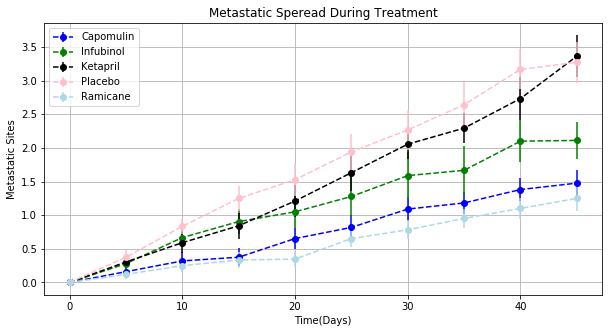

In [84]:
plt.figure(figsize =(10,5))

Capomulin_error = Metsite_error.loc[Metsite_error["Drug"]=="Capomulin","Metastatic Sites"]
#Capomulin_error 
#Ceftamin_error = Metsite_error.loc[Metsite_error["Drug"]=="Ceftamin","Metastatic Sites"]
Infubinol_error = Metsite_error.loc[Metsite_error["Drug"]=="Ketapril","Metastatic Sites"]
Ketapril_error = Metsite_error.loc[Metsite_error["Drug"]=="Infubinol","Metastatic Sites"]
#Naftisol_error = Metsite_error.loc[Metsite_error["Drug"]=="Naftisol","Metastatic Sites"]
Placebo_error = Metsite_error.loc[Metsite_error["Drug"]=="Placebo","Metastatic Sites"]
#Propriva_error = Metsite_error.loc[Metsite_error["Drug"]=="Propriva","Metastatic Sites"]
Ramicane_error = Metsite_error.loc[Metsite_error["Drug"]=="Ramicane","Metastatic Sites"]
#Stelasyn_error = Metsite_error.loc[Metsite_error["Drug"]=="Stelasyn","Metastatic Sites"]
#Zoniferol_error = Metsite_error.loc[Metsite_error["Drug"]=="Zoniferol","Metastatic Sites"]

plt.errorbar(Time,cleaned_Metsite_data["Capomulin"], yerr = Capomulin_error, label = "Capomulin", marker = "o", color= "blue", linestyle ='--' )
#plt.errorbar(Time, cleaned_Metsite_data["Ceftamin"], yerr = Ceftamin_error, label = "Ceftamin", marker = "o", color= "red", linestyle ='--')
plt.errorbar(Time, cleaned_Metsite_data["Infubinol"], yerr = Infubinol_error, label = "Infubinol", marker = "o", color= "green", linestyle ='--')
plt.errorbar(Time, cleaned_Metsite_data["Ketapril"], yerr = Ketapril_error, label = "Ketapril", marker = "o", color= "black", linestyle ='--')
#plt.errorbar(Time, cleaned_Metsite_data["Naftisol"], yerr = Naftisol_error, label = "Naftisol", marker = "o", color= "orange", linestyle ='--')
plt.errorbar(Time, cleaned_Metsite_data["Placebo"], yerr = Placebo_error, label = "Placebo", marker = "o", color= "pink", linestyle ='--')
#plt.errorbar(Time, cleaned_Metsite_data["Propriva"], yerr = Propriva_error, label = "Propriva", marker = "o", color= "brown", linestyle ='--')
plt.errorbar(Time, cleaned_Metsite_data["Ramicane"], yerr = Ramicane_error, label = "Ramicane", marker = "o", color= "lightblue", linestyle ='--')
#plt.errorbar(Time, cleaned_Metsite_data["Stelasyn"], yerr = Stelasyn_error, label = "Stelasyn", marker = "o", color= "grey", linestyle ='--')
#plt.errorbar(Time, cleaned_Metsite_data["Zoniferol"], yerr = Zoniferol_error, label = "Zoniferol", marker = "o", color= "purple", linestyle ='--')
plt.legend(loc =2)
plt.title ("Metastatic Speread During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.savefig("Metastatic.png")
plt.show()


In [80]:
# Survival Rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_data = data.groupby(["Drug","Timepoint"])
#grouped_data.head()
mouse_count = grouped_data["Mouse ID"].count()
#mouse_count.head()
#Convert to DataFrame
mouse_data =pd.DataFrame(mouse_count).reset_index()
#change the MouseID column to mouse count
mouse_data =mouse_data.rename(columns={"Mouse ID":"Count"})
mouse_data.head()


,Drug,Timepoint,Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [81]:
# Minor Data Munging to Re-Format the Data Frames
formated_mouse_data = mouse_data.pivot(index = "Timepoint", columns = "Drug", values= "Count")
formated_mouse_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


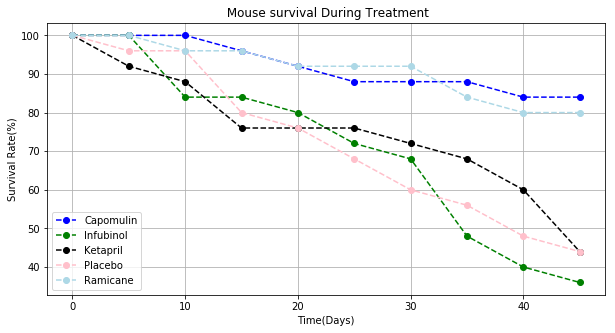

In [85]:
plt.figure(figsize =(10,5))

plt.plot(Time, (formated_mouse_data["Capomulin"]/25)*100,label = "Capomulin", marker = "o", color= "blue", linestyle ='--' )
#plt.plot(Time, (formated_mouse_data["Ceftamin"]/25)*100,  label = "Ceftamin", marker = "o", color= "red", linestyle ='--')
plt.plot(Time, (formated_mouse_data["Infubinol"]/25)*100,  label = "Infubinol", marker = "o", color= "green", linestyle ='--')
plt.plot(Time, (formated_mouse_data["Ketapril"]/25)*100,  label = "Ketapril", marker = "o", color= "black", linestyle ='--')
#plt.plot(Time, (formated_mouse_data["Naftisol"]/25)*100,  label = "Naftisol", marker = "o", color= "orange", linestyle ='--')
plt.plot(Time, (formated_mouse_data["Placebo"]/25)*100,  label = "Placebo", marker = "o", color= "pink", linestyle ='--')
#plt.plot(Time, (formated_mouse_data["Propriva"]/26)*100,  label = "Propriva", marker = "o", color= "brown", linestyle ='--')
plt.plot(Time, (formated_mouse_data["Ramicane"]/25)*100,  label = "Ramicane", marker = "o", color= "lightblue", linestyle ='--')
#plt.plot(Time, (formated_mouse_data["Stelasyn"]/26)*100,  label = "Stelasyn", marker = "o", color= "grey", linestyle ='--')
#plt.plot(Time, (formated_mouse_data["Zoniferol"]/25)*100, label = "Zoniferol", marker = "o", color= "purple", linestyle ='--')
plt.legend()
plt.title (" Mouse survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.grid()
plt.savefig("survival_rate.png")
plt.show()

In [23]:
# Calculate the percent changes for each drug
initial_tumer_volume = 45
pct_change = ((clean_Data.loc[45,:]-initial_tumer_volume)/initial_tumer_volume)*100
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [24]:
type(pct_change)

pandas.core.series.Series

In [25]:
tuple_change_pct=tuple(zip(pct_change.index, pct_change))
tuple_change_pct_list= list(tuple_change_pct)
tuple_change_pct_list

[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.57975086509525)]

In [27]:
# Splice the data between passing and failing drugs
passing_drug_list = []
failing_drug_list = []
passing_drug_index = []
failing_drug_index = []
for i, drugs in tuple_change_pct_list:
    if drugs <0:
        passing_drug = drugs
        passing_drug_list.append(drugs)
        #passing_drug_index = i
        passing_drug_index.append(i)
    else:
        failing_drug = drugs
        failing_drug_list.append(drugs)
        #failing_drug_index= i
        failing_drug_index.append(i)
passing_drugs =list(zip(passing_drug_index,passing_drug_list))
failing_drugs = list(zip(failing_drug_index,failing_drug_list))


In [28]:
passing_drugs

[('Capomulin', -19.475302667894173), ('Ramicane', -22.320900462766673)]

In [29]:
failing_drugs

[('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.57975086509525)]

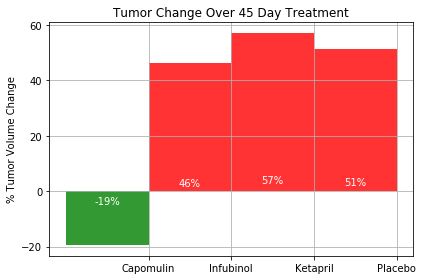

In [91]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value1 = [pct_change["Infubinol"], pct_change["Ketapril"], pct_change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]
bars1 = ax.bar(x_axis1, pct_change["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1 , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")
        
autolabel(bars1)
autolabel(bars2)
fig.tight_layout()
plt.savefig("Tumor_volume_change")




In [87]:
# plt.bar(passing_drug(["Capomulin"],["Ramicane"]))

In [88]:
# x_axis = passing_drugs([0][0],[1][0])
# x_axis